# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

# Load and Read the dataset

In [2]:
df=pd.read_csv("../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns #gives column names in the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape #shows no of rows and columns in the dataset

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


so we can see that we have total 13 attributes out of which 12 attributes are Independent variables and 1 attribute (Loan_Status) is dependent variable.
we can also see the datatype of each variable. 

# Data Preprocessing

In [7]:
#let`s check the missing values with in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#fill the missing values for numerical terms - mean
LoanAmountMean = df["LoanAmount"].mean()
LoanAmountTermMean = df["Loan_Amount_Term"].mean()
df["LoanAmount"] = df["LoanAmount"].fillna(LoanAmountMean)
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(LoanAmountTermMean)
# I have replaced missing values in Credit_History column with most frequent value - 1.0
df["Credit_History"] = df["Credit_History"].fillna(1.0)

In [9]:
#fill the missing values for categorical terms - mode
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [10]:
df.isnull().sum() #now we can see that their are no missing values in the dataset

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Creating New Features

In [11]:
# ApplicantIncome and CoapplicantIncome can be combined together 
# so we are adding these two columns and making a new column called TotalIncome
# and we will drop ApplicantIncome and CoapplicantIncome columns
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
cols=["ApplicantIncome","CoapplicantIncome","Loan_ID"]
df.drop(cols,axis=1,inplace=True)


In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


# Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

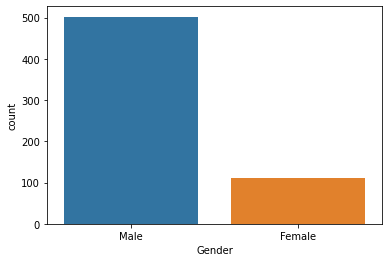

In [13]:
#categorical attriburtes visualization
sns.countplot(df["Gender"])

so we can analyse from this plot that majority of the data is for Male

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Married', ylabel='count'>

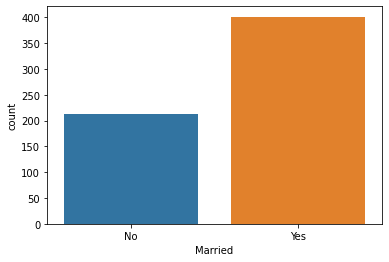

In [14]:
sns.countplot(df["Married"])

so majority of the applicants are married

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dependents', ylabel='count'>

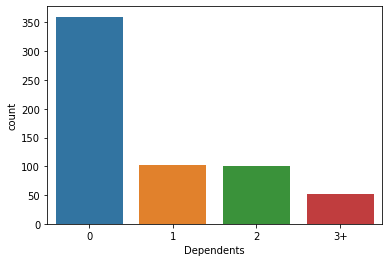

In [15]:
sns.countplot(df["Dependents"])

so most of the applicants have 0 dependents and very few have 3+ dependents

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='count'>

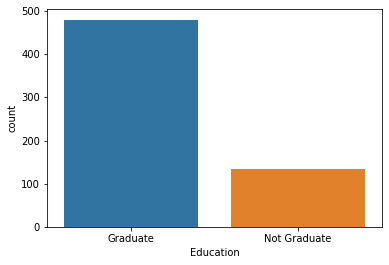

In [16]:
sns.countplot(df["Education"])

We can see from the above graph that most of the applicants are Graduate.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

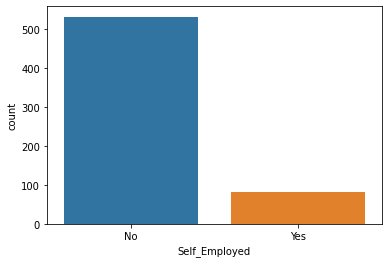

In [17]:
sns.countplot(df["Self_Employed"])

Most of the applicants are not self employed.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

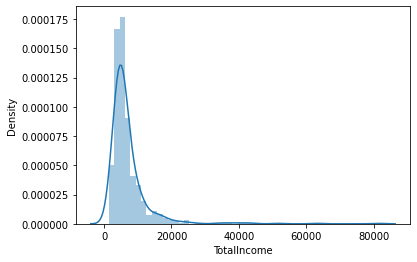

In [18]:
# numerical attributes visualization
sns.distplot(df["TotalIncome"])

MAjority of the TotalIncome of applicants is between 0-10,000 , only few are from 20,000 onwards.
graph is left skewed i.e most of the applicants are on the left side which is not a good distribution for training the model.so we will apply the log function in the column to normalize the attribute and make a bell curve.

If you see the graph "left skewed or right skewed", you can apply
1. log transformation
2. Min-Max Normalization
3. Standarization
These are the common techniques to normalize the distribution in order to train the model better.

In [19]:
# apply log transformation to the attribute
df["TotalIncome"]= np.log(df["TotalIncome"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

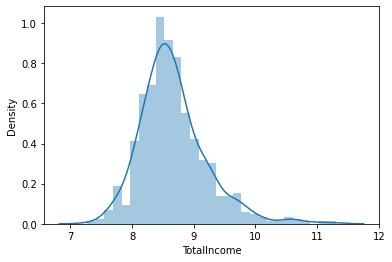

In [20]:
sns.distplot(df["TotalIncome"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

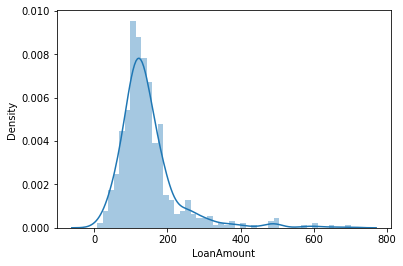

In [21]:
sns.distplot(df["LoanAmount"])

so the distribution for CoapplicantIncome is also left skewed. we will apply log transformation here as well.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

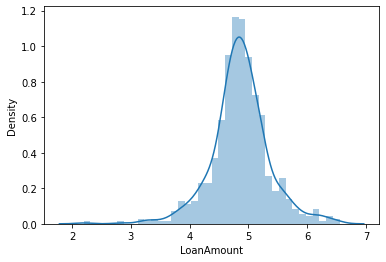

In [22]:
df["LoanAmount"] = np.log(df["LoanAmount"])
sns.distplot(df["LoanAmount"])

so now the distribution of LoanAmount is better than before.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

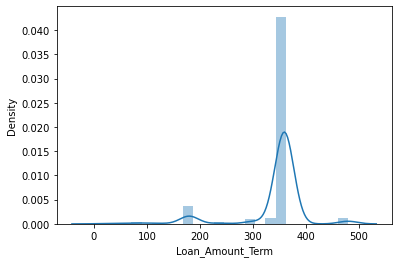

In [23]:
sns.distplot(df["Loan_Amount_Term"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

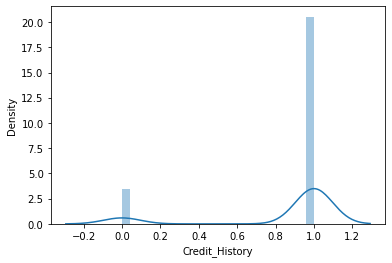

In [24]:
sns.distplot(df["Credit_History"])

No need to apply transformation here because values are already in the range of 0-1

# Correlation Matrix

Correlation Matrix is used to see the relationship between variables. if the correlation between two variables is high , drop any one of the variable (This is the best practice). 

<AxesSubplot:>

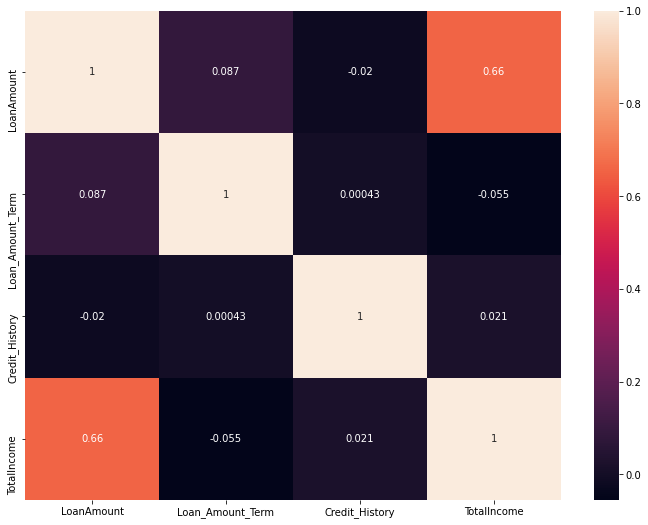

In [25]:
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot = True)

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,4.986426,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,Y,8.699515


# Label Encoding 

## Converting Categorical variables into numerical using label encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,4.986426,360.0,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,360.0,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,1,8.699515


Now we can see all the columns are converted into numerical columns and we can now easily train our model.

# Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
X = df.drop("Loan_Status",axis=1)
Y = df["Loan_Status"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

We have splitted the data like 20% for testing and 80% for training.

# Model Training (Logistic Regression, Decision Tree, Random Forest)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy of model is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("Cross Validation is",np.mean(score)*100)

Accuracy of model is 78.86178861788618
Cross Validation is 80.9462881514061


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy of model is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("Cross Validation is",np.mean(score)*100)

Accuracy of model is 70.73170731707317
Cross Validation is 69.54551512728241


In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
print("Accuracy of model is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("Cross Validation is",np.mean(score)*100)

Accuracy of model is 78.04878048780488
Cross Validation is 77.20378515260563


# Fine Tuning

In [33]:
# Let`s fine tune the hyper parameters of RandomForest 
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
model.fit(x_train,y_train)
print("Accuracy of model is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("Cross Validation is",np.mean(score)*100)

Accuracy of model is 78.86178861788618
Cross Validation is 80.45581767293083


# Confusion Matrix

<AxesSubplot:>

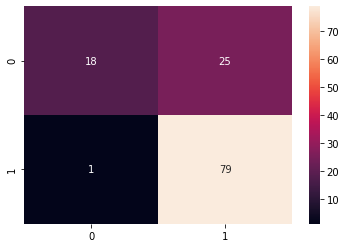

In [34]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)
